In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
drugs = pd.read_excel("drug_consumption.xls")

In [3]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

### Handling the ```semer``` variable

In [4]:
semer = drugs[drugs['Semer'] != "CL0"]
semer

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
727    730 -0.07854  0.48246   -1.73790 -0.09765   -0.31685 -0.58016  0.32197   
817    821 -0.95197 -0.48246   -0.61113 -0.09765   -0.50212 -0.67825  1.74091   
1516  1520 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685 -0.24649 -0.80615   
1533  1537 -0.95197  0.48246   -0.61113 -0.57009    0.11440 -0.46725  0.80523   
1698  1702  0.49788  0.48246    0.45468 -0.57009   -0.31685  1.98437 -0.80615   
1769  1773 -0.95197 -0.48246   -1.22751 -0.57009   -0.22166 -0.34799  1.28610   
1806  1810 -0.95197  0.48246   -1.43719 -0.57009   -0.31685  1.23461  1.11406   
1823  1827 -0.95197  0.48246    0.45468 -0.57009   -0.31685  0.22393 -0.30033   

       Oscore   Ascore  ...  Ecstasy  Heroin  Ketamine Legalh  LSD Meth  \
727   0.14143 -0.60633  ...      CL2     CL2       CL2    CL0  CL4  CL2   
817   0.72330  0.13136  ...      CL3     CL0       CL0    CL0  CL5  CL0   
1516 -1.27553 -1.34289  ...      CL1     CL2       CL1    CL2  CL1  CL2   
1533  0.29338  2.03972  ...      CL4     CL0       CL4    CL3  CL2  CL0   
1698  2.15324  0.76096  ...      CL2     CL0       CL2    CL2  CL2  CL0   
1769  1.06238 -0.01729  ...      CL3     CL0       CL4    CL3  CL6  CL3   
1806  1.06238 -1.47955  ...      CL4     CL2       CL1    CL4  CL1  CL0   
1823  0.88309  1.28610  ...      CL0     CL0       CL0    CL2  CL3  CL0   

     Shrooms Nicotine Semer  VSA  
727      CL6      CL6   CL2  CL2  
817      CL5      CL4   CL3  CL0  
1516     CL4      CL2   CL3  CL1  
1533     CL3      CL4   CL4  CL3  
1698     CL2      CL6   CL2  CL0  
1769     CL3      CL3   CL1  CL3  
1806     CL1      CL6   CL1  CL2  
1823     CL3      CL5   CL2  CL0  

[8 rows x 32 columns]

Drop all rows containing Semer as a drug used

In [5]:
drugs = drugs[drugs['Semer'] == "CL0"]

In [6]:
drugs.shape

(1877, 32)

Drop the whole column

In [7]:
drugs = drugs.drop("Semer", axis=1)

In [8]:
drugs.shape

(1877, 31)

## Assumptions

**1. :** Certain personality traits will be correlated with a drug abuse. 

**2. :** For example we expect that ```Sensation Seeking``` and ```Impulsivness``` will have higher correlations

**3. :** Depending on educational background, the substances used will differ.

**4. :** If you seperate legal from illegal drugs, the use rate of legal drugs will be higher in comparison to illegal drugs.

**5. :** Due to gender differences in personality traits, drug abuse between gender will differ. We expect that ```sensation seekin```
 will be higher for males and therefore the drug abuse for males will be higher.

**6. :** Personality traits will not be significantly different between the different ages

## Inspecting the variables

In [9]:
def plot_hist_numeric(df, figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8):
    df_num = df.select_dtypes(include = ['float', 'int'])
    df_num.hist(figsize=figsize, bins=bins, xlabelsize=xlabelsize, ylabelsize=ylabelsize);

## Plot the numerical data

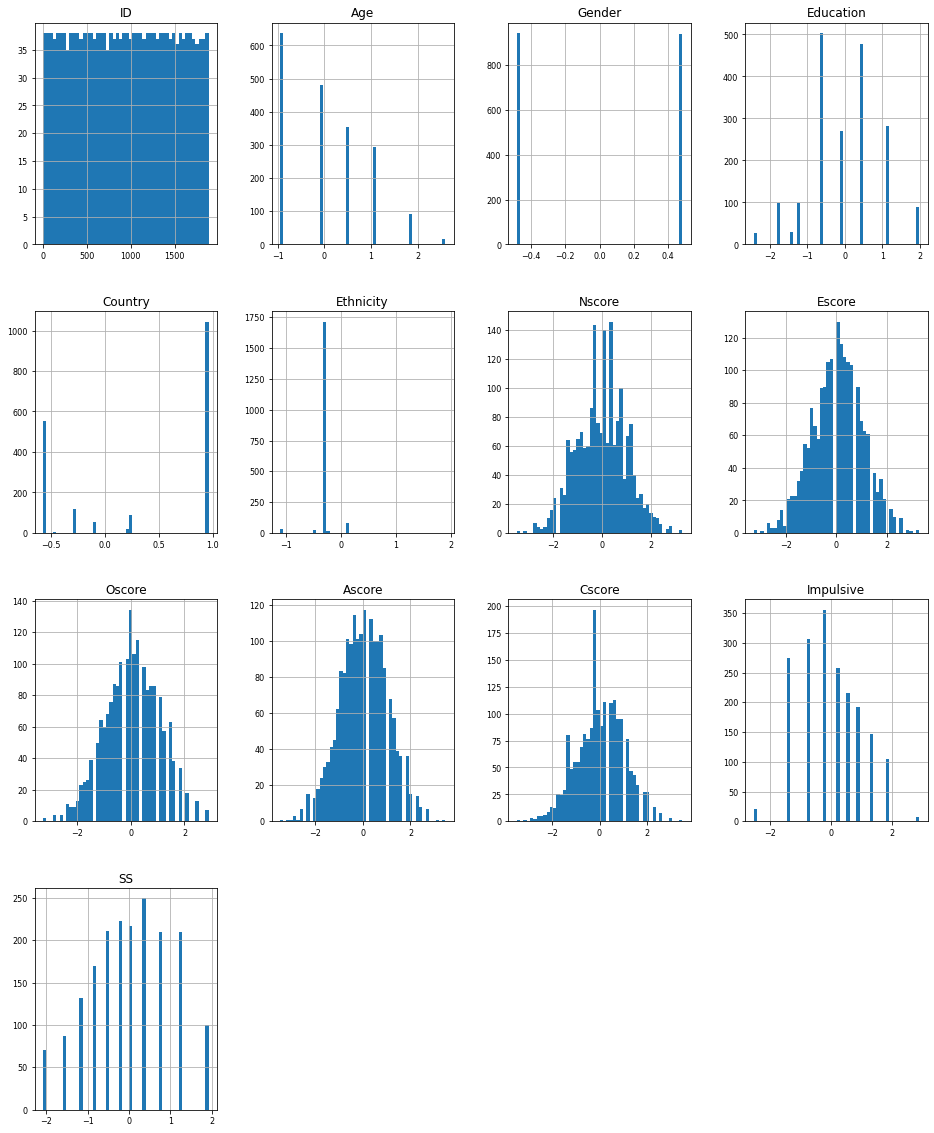

In [10]:
plot_hist_numeric(drugs, figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

## Demografic Data

The columns containing the demografic data of our interest are ```age```, ```gender``` and ```education``` 

In [11]:
demographic_columns = [
    'Age', 
    'Gender', 
    'Education',
]

In [12]:
age = ['18-24' if a <= -0.9 else 
       '25-34' if a >= -0.5 and a < 0 else 
       '35-44' if a > 0 and a < 1 else 
       '45-54' if a > 1 and a < 1.5 else 
       '55-64' if a > 1.5 and a < 2 else 
       '65+' 
       for a in drugs['Age']]

drugs["Age"] = age

<AxesSubplot:xlabel='Age', ylabel='count'>

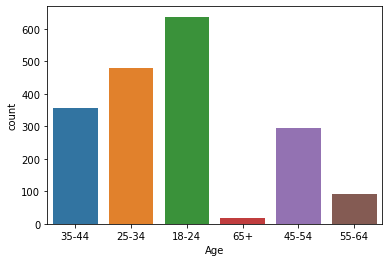

In [13]:
sns.countplot(x='Age', data=drugs)

In [14]:
gender = ['Female' if g > 0 else "Male" for g in drugs['Gender']]

drugs["Gender"] = gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

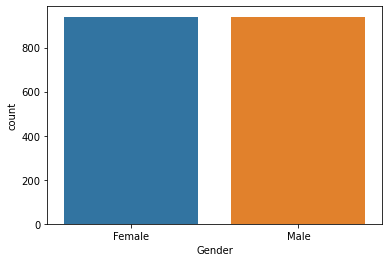

In [15]:
sns.countplot(x='Gender', data=drugs)

In [16]:
education = ['Left school before 16 years' if e <-2 else 
             'Left school at 16 years' if e > -2 and e < -1.5 else 
             'Left school at 17 years' if e > -1.5 and e < -1.4 else 
             'Left school at 18 years' if e > -1.4 and e < -1 else 
             'Some college or university, no certificate or degree' if e > -1 and e < -0.5 else 
             'Professional certificate/ diploma' if e > -0.5 and e < 0 else 
             'University degree' if e > 0 and e < 0.5 else 
             'Masters degree' if e > 0.5 and e < 1.5 else 
             'Doctorate degree' 
             for e in drugs['Education']]

drugs["Education"] = education

<AxesSubplot:xlabel='Education', ylabel='count'>

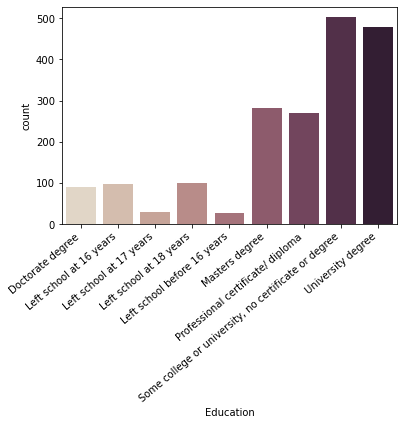

In [17]:
edu_plot = sns.countplot(x='Education', palette='ch:.25', data=drugs.sort_values(by=['Education']))
edu_plot.set_xticklabels(edu_plot.get_xticklabels(), rotation=40, ha="right")
edu_plot

## Drug data

In [18]:
drugs_columns = [
    'Alcohol',
    'Amphet',
    'Amyl',
    'Benzos',
    'Caff',
    'Cannabis',
    'Choc',
    'Coke',
    'Crack',
    'Ecstasy',
    'Heroin',
    'Ketamine',
    'Legalh',
    'LSD',
    'Meth',
    'Shrooms',
    'Nicotine',
    'VSA'
]

for i in drugs_columns:
    drugs[i] = drugs[i].apply(lambda x: int(x[-1]))
 

In [19]:
for i in drugs_columns:
    drugs[i] = drugs[i].apply(lambda x: 0 if x <3 else 1)

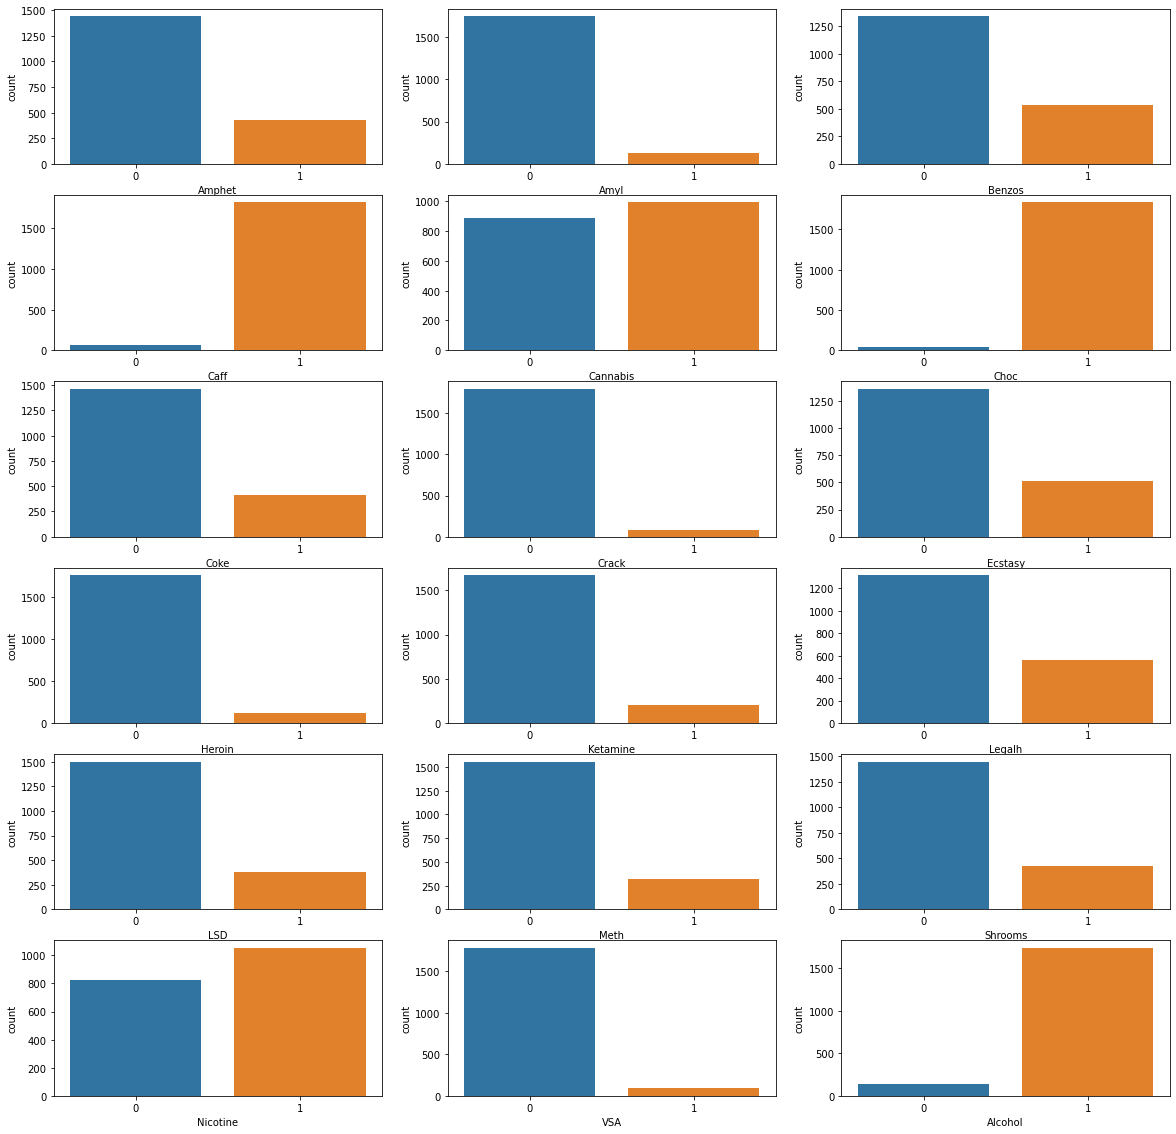

In [20]:
fig, ax = plt.subplots(ncols=3, nrows=6, figsize=(20,20))


f1 = sns.countplot(x='Amphet', data=drugs, ax=ax[0,0]);
f1.set_xticks(range(0, 2))

f2 = sns.countplot(x='Amyl', data=drugs, ax=ax[0,1])
f2.set_xticks(range(0, 2))

f3 = sns.countplot(x='Benzos', data=drugs, ax=ax[0,2])
f3.set_xticks(range(0, 2))


f4 = sns.countplot(x='Caff', data=drugs, ax=ax[1,0])
f4.set_xticks(range(0, 2))

f5 = sns.countplot(x='Cannabis', data=drugs, ax=ax[1,1])
f5.set_xticks(range(0, 2))

f6 = sns.countplot(x='Choc', data=drugs, ax=ax[1,2])
f6.set_xticks(range(0, 2))


f7 = sns.countplot(x='Coke', data=drugs, ax=ax[2,0])
f7.set_xticks(range(0, 2))

f8 = sns.countplot(x='Crack', data=drugs, ax=ax[2,1])
f8.set_xticks(range(0, 2))

f9 = sns.countplot(x='Ecstasy', data=drugs, ax=ax[2,2])
f9.set_xticks(range(0, 2))


f10 = sns.countplot(x='Heroin', data=drugs, ax=ax[3,0])
f10.set_xticks(range(0, 2))

f11 = sns.countplot(x='Ketamine', data=drugs, ax=ax[3,1])
f11.set_xticks(range(0, 2))

f12 = sns.countplot(x='Legalh', data=drugs, ax=ax[3,2])
f12.set_xticks(range(0, 2))


f13 = sns.countplot(x='LSD', data=drugs, ax=ax[4,0])
f13.set_xticks(range(0, 2))

f14 = sns.countplot(x='Meth', data=drugs, ax=ax[4,1])
f14.set_xticks(range(0, 2))

f15 = sns.countplot(x='Shrooms', data=drugs, ax=ax[4,2])
f15.set_xticks(range(0, 2))


f16 = sns.countplot(x='Nicotine', data=drugs, ax=ax[5,0])
f16.set_xticks(range(0, 2))


f17 = sns.countplot(x='VSA', data=drugs, ax=ax[5,1])
f17.set_xticks(range(0, 2))

f18 = sns.countplot(x='Alcohol', data=drugs, ax=ax[5,2])
f18.set_xticks(range(0, 2))

## Personality Data

In [ ]:
personality_columns = [
    'Neuroticism',
    'Extraversion',
    'Openness to experience',
    'Agreeableness',
    'Conscientiousness',
    'Impulsiveness',
    'Sensation seeking'
]

## Adding new drug columns

In [21]:
drugs = drugs.drop("Choc", axis=1)
drugs = drugs.drop("Caff", axis=1)

In [22]:
drugs.shape

(1877, 29)

In [24]:
legal_drug = []




for alc, nic in zip(drugs["Alcohol"].tolist(), drugs["Nicotine"].tolist()):
    if alc == 1 or nic == 1:
        legal_drug.append(1)
    else:
        legal_drug.append(0)

In [28]:
drugs["legal_drugs"] = legal_drug

In [ ]:
illlegal_drug = []



In [30]:
df_temp = drugs

df_temp = df_temp.drop("Alcohol", axis=1)

df_temp = df_temp.drop("Nicotine", axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 1884
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1877 non-null   int64  
 1   Age          1877 non-null   object 
 2   Gender       1877 non-null   object 
 3   Education    1877 non-null   object 
 4   Country      1877 non-null   float64
 5   Ethnicity    1877 non-null   float64
 6   Nscore       1877 non-null   float64
 7   Escore       1877 non-null   float64
 8   Oscore       1877 non-null   float64
 9   Ascore       1877 non-null   float64
 10  Cscore       1877 non-null   float64
 11  Impulsive    1877 non-null   float64
 12  SS           1877 non-null   float64
 13  Amphet       1877 non-null   int64  
 14  Amyl         1877 non-null   int64  
 15  Benzos       1877 non-null   int64  
 16  Cannabis     1877 non-null   int64  
 17  Coke         1877 non-null   int64  
 18  Crack        1877 non-null   int64  
 19  Ecstas

In [31]:
df_temp = df_temp.drop("legal_drugs", axis=1)

In [32]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 1884
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1877 non-null   int64  
 1   Age        1877 non-null   object 
 2   Gender     1877 non-null   object 
 3   Education  1877 non-null   object 
 4   Country    1877 non-null   float64
 5   Ethnicity  1877 non-null   float64
 6   Nscore     1877 non-null   float64
 7   Escore     1877 non-null   float64
 8   Oscore     1877 non-null   float64
 9   Ascore     1877 non-null   float64
 10  Cscore     1877 non-null   float64
 11  Impulsive  1877 non-null   float64
 12  SS         1877 non-null   float64
 13  Amphet     1877 non-null   int64  
 14  Amyl       1877 non-null   int64  
 15  Benzos     1877 non-null   int64  
 16  Cannabis   1877 non-null   int64  
 17  Coke       1877 non-null   int64  
 18  Crack      1877 non-null   int64  
 19  Ecstasy    1877 non-null   int64  
 20  Heroin  

In [33]:
df_temp["illegal_drugs"] = df_temp.iloc[:, 13:].sum(axis=1)

In [35]:
df_temp["illegal_drugs"] = df_temp["illegal_drugs"].apply(lambda x: 0 if x<1 else 1)

In [37]:
drugs = pd.concat([df_temp["illegal_drugs"], drugs], axis=1)

In [39]:
drugs.columns

Index(['illegal_drugs', 'ID', 'Age', 'Gender', 'Education', 'Country',
       'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore',
       'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Cannabis',
       'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
       'Meth', 'Shrooms', 'Nicotine', 'VSA', 'legal_drugs'],
      dtype='object')